In [924]:
# Supress Warnings
# libraries

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [925]:
# loading the data
car = pd.read_csv("CarPrice_Assignment.csv")

In [926]:
# Check the head of the dataset
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Inspect the various aspects of the housing dataframe

In [927]:
print(car.shape)

car.info()

(205, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
pea

In [928]:
#Checking for NaN values in columns
car.isna().sum()

# No missing values

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [929]:
# checking for duplicate rows

car.duplicated().sum()

#no duplicate rows

0

In [930]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### From above table we can notice there are outliers for a few variables

Let us see how we can logically explain them.

In [931]:
np.percentile(car['compressionratio'],(70,75,85,90,95))

array([ 9.4 ,  9.4 ,  9.5 , 10.94, 21.82])

#### compressionratio 
we can see that there is a sudden increase of values from 90th %tile. However diesel engines from bigger brands have compression ratio above 20. As in the data all the values are from diesel engines so not handling them.

#### horsepower
 the value 288 (100th %tile) is because the porsche car has 8 cylinders for that observation. So, not considering it as an outlier.

## Conclusion on outliers
As per the business understanding, the high values in some variables are due to high number of cylinders, engine  size etc. Bigger brand's premium cars may have such values. So continuing without handling the outliers

In [932]:
# separating the brand name of the car from the CarName variable

car["Company"]=car["CarName"].str.split(" ").str[0]
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [933]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

#### changing some variables to categorical variables according to data dictionary.

In [934]:
for col in['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']:
    car[col]=car[col].astype('category')

car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
car_ID              205 non-null int64
symboling           205 non-null category
CarName             205 non-null object
fueltype            205 non-null category
aspiration          205 non-null category
doornumber          205 non-null category
carbody             205 non-null category
drivewheel          205 non-null category
enginelocation      205 non-null category
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null category
cylindernumber      205 non-null category
enginesize          205 non-null int64
fuelsystem          205 non-null category
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-nul

#### Dropping CarName and car_ID columns as they are not required for modelling

In [935]:
car=car.drop(['car_ID','CarName'],axis=1)
car.shape

(205, 25)

#### Handling descrepancies in Car company name

In [936]:
varlist =  ['Company']

# Defining the map function
def car_company(x):
    return x.map({'audi':'audi','bmw':'bmw','chevrolet':'chevrolet','dodge':'dodge','honda':'honda','isuzu':'isuzu',
                  'Nissan': 'nissan', 'nissan':'nissan', 'porsche':'porsche','porcshce': 'porsche','toyouta':'toyota',
                  'jaguar':'jaguar','renault':'renault','saab':'saab','subaru':'subaru','toyota':'toyota',
                  'buick':'buick','peugeot':'peugeot','plymouth':'plymouth','volvo':'volvo','mazda':'mazda',
                  'mercury':'mercury','mitsubishi':'mitsubishi','volkswagen':'volkswagen',
                  'vokswagen':'volkswagen','vw':'volkswagen','maxda':'mazda','alfa-romero':'alfa-romeo'})

# Applying the function to the housing list
car[varlist] = car[varlist].apply(car_company)

In [937]:
print(car.shape)
car['Company'].nunique()

(205, 25)


22

In [938]:
#Changing Company as category

car['Company']=car['Company'].astype('category')

#### Handling descrepancies in enginetype column

In [939]:
car['enginetype'].unique()

[dohc, ohcv, ohc, l, rotor, ohcf, dohcv]
Categories (7, object): [dohc, ohcv, ohc, l, rotor, ohcf, dohcv]

In [940]:
car['enginetype']=car['enginetype'].map({'dohc':'dohc', 'ohcv':'ohcv', 'ohc':'ohc', 'l':'l', 'rotor':'rotor','dohcv': 'dohc','ohcf':'ohcv'})
car['enginetype'].nunique()

5

In [941]:
#Changing enginetype as category after changing data

car['enginetype']=car['enginetype'].astype('category')

### DUMMY variable creation

#### creating dummy variables for variables with 2 levels

In [942]:
car['enginelocation'].unique()

[front, rear]
Categories (2, object): [front, rear]

In [943]:
# List of variables to map

varlist =  ['fueltype','aspiration','doornumber','enginelocation']

# Defining the map function
def binary_map(x):
    return x.map({'diesel':1, 'gas':0,'std':1, 'turbo':0,'four':1,'two':0,'front':1,'rear':0})

# Applying the function to the housing list
car[varlist] = car[varlist].apply(binary_map)

#### creating dummy variables for variables with more than 3 levels

In [944]:
status = pd.get_dummies(car[['symboling','Company','carbody','drivewheel','enginetype','cylindernumber','fuelsystem']],drop_first = True)

In [945]:
status.shape

(205, 49)

In [946]:
car = pd.concat([car, status], axis = 1)
car.head()
print(car.shape)

(205, 74)


In [947]:
car.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'Company', 'symboling_-1',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'Company_audi', 'Company_bmw', 'Company_buick', 'Company_chevrolet',
       'Company_dodge', 'Company_honda', 'Company_isuzu', 'Company_jaguar',
       'Company_mazda', 'Company_mercury', 'Company_mitsubishi',
       'Company_nissan', 'Company_peugeot', 'Company_plymouth',
       'Company_porsche', 'Company_renault', 'Company_saab', 'Company_subaru',
       'Company_toyota', 'Company_volkswagen', 'Company_volvo',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 

In [948]:
### dropping the columns which are not required
car.drop(['Company','carbody','drivewheel','enginetype','cylindernumber','fuelsystem','fueltype','aspiration','doornumber','enginelocation'], axis = 1, inplace = True)

In [949]:
car.shape

(205, 64)

In [950]:
car.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


### Splitting the Data into Training and Testing Sets

In [951]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(car, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the Features

In [952]:
from sklearn.preprocessing import MinMaxScaler

In [953]:
scaler = MinMaxScaler()

In [954]:
#Applying scalar to remaining elements
scaling  = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize', 'boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg','highwaympg','price']

df_train[scaling] = scaler.fit_transform(df_train[scaling])

In [955]:
df_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,0.6,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,...,0,0,0,1,0,0,0,0,0,0
125,1.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,...,0,0,0,0,0,0,0,1,0,0
166,0.6,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,...,0,0,0,0,0,0,0,1,0,0
199,0.2,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,...,0,0,0,0,0,0,0,1,0,0


In [956]:
df_train.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.559441,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,...,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.239200,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,...,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.400000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.600000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.600000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


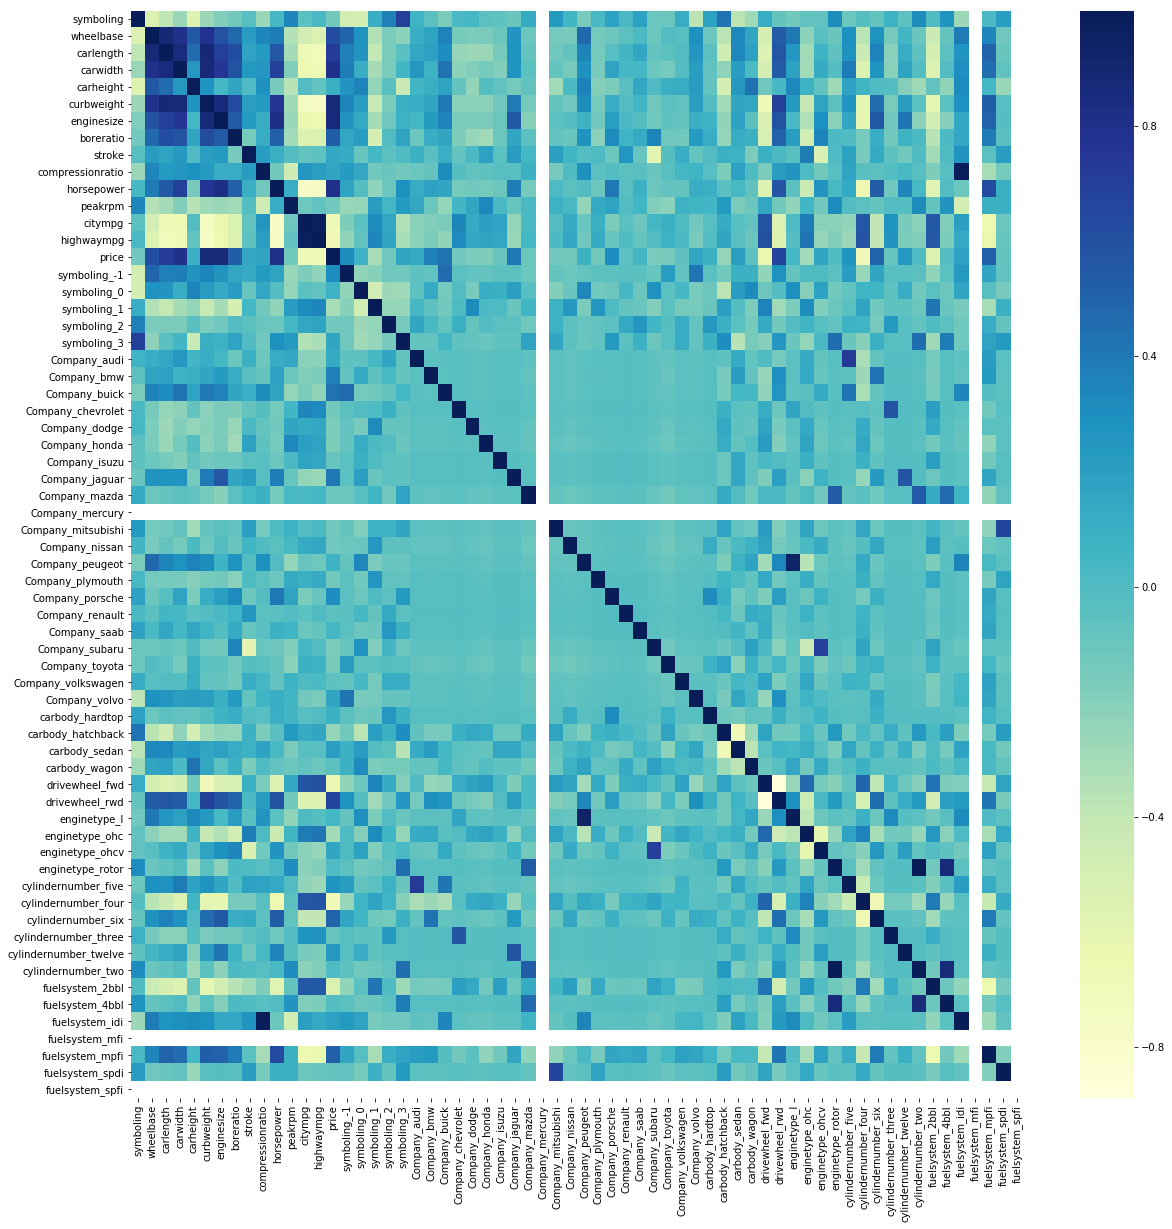

In [957]:
#checking the highly corelated variables using visualization

plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(),  cmap="YlGnBu")
plt.show()

As there are good amount of columns, so reading the heatmap is tough.

### Dividing into X and Y sets for the model building

In [958]:
y_train = df_train.pop('price')
X_train = df_train

## Building a linear model
we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [959]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [960]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 64 columns):
symboling                205 non-null category
wheelbase                205 non-null float64
carlength                205 non-null float64
carwidth                 205 non-null float64
carheight                205 non-null float64
curbweight               205 non-null int64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
citympg                  205 non-null int64
highwaympg               205 non-null int64
price                    205 non-null float64
symboling_-1             205 non-null uint8
symboling_0              205 non-null uint8
symboling_1              205 non-null uint8
symboling_2              205 non-null uint8
symboling_3              205 non-null ui

In [961]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [962]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 32),
 ('wheelbase', False, 29),
 ('carlength', False, 24),
 ('carwidth', True, 1),
 ('carheight', False, 23),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 38),
 ('horsepower', False, 7),
 ('peakrpm', False, 16),
 ('citympg', False, 46),
 ('highwaympg', False, 31),
 ('symboling_-1', False, 28),
 ('symboling_0', False, 30),
 ('symboling_1', False, 33),
 ('symboling_2', False, 37),
 ('symboling_3', False, 36),
 ('Company_audi', False, 12),
 ('Company_bmw', True, 1),
 ('Company_buick', False, 10),
 ('Company_chevrolet', False, 50),
 ('Company_dodge', False, 42),
 ('Company_honda', False, 43),
 ('Company_isuzu', False, 15),
 ('Company_jaguar', False, 9),
 ('Company_mazda', False, 20),
 ('Company_mercury', False, 51),
 ('Company_mitsubishi', False, 39),
 ('Company_nissan', False, 21),
 ('Company_peugeot', False, 5),
 ('Company_plymouth', False, 40),
 ('Company_porsche', True, 1),
 ('Compa

In [963]:
##columns which are shortlisted by RFE
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'Company_bmw', 'Company_porsche', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [964]:
##columns which are not included
X_train.columns[~rfe.support_]

Index(['symboling', 'wheelbase', 'carlength', 'carheight', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'symboling_-1',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'Company_audi', 'Company_buick', 'Company_chevrolet', 'Company_dodge',
       'Company_honda', 'Company_isuzu', 'Company_jaguar', 'Company_mazda',
       'Company_mercury', 'Company_mitsubishi', 'Company_nissan',
       'Company_peugeot', 'Company_plymouth', 'Company_renault',
       'Company_saab', 'Company_subaru', 'Company_toyota',
       'Company_volkswagen', 'Company_volvo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuel

### Building model using statsmodel, for the detailed statistics

In [965]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [966]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [967]:
lm1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [968]:
# summary of our initial model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     129.4
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.83e-63
Time:                        22:02:35   Log-Likelihood:                 187.10
No. Observations:                 143   AIC:                            -352.2
Df Residuals:                     132   BIC:                            -319.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.08

In [969]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.72
2,curbweight,9.34
3,enginesize,7.96
1,carwidth,4.63
4,boreratio,2.20
9,cylindernumber_twelve,1.74
5,stroke,1.50
7,Company_porsche,1.28
10,cylindernumber_two,1.27
6,Company_bmw,1.16


`cylindernumber_twelve` is insignificant in presence of other variables; can be dropped

In [970]:
X_train_rfe2 = X_train_rfe.drop(["cylindernumber_twelve"], axis = 1)

Rebuilding the model without `cylindernumber_twelve`

In [971]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm2 = sm.add_constant(X_train_rfe2)


# Running the linear model
lm2 = sm.OLS(y_train,X_train_lm2).fit()   

In [972]:
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     140.5
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.96e-63
Time:                        22:02:39   Log-Likelihood:                 185.10
No. Observations:                 143   AIC:                            -350.2
Df Residuals:                     133   BIC:                            -320.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0990 

In [973]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X =X_train_lm2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,25.01
2,curbweight,8.58
3,enginesize,5.15
1,carwidth,4.62
4,boreratio,2.12
5,stroke,1.28
7,Company_porsche,1.23
9,cylindernumber_two,1.17
6,Company_bmw,1.10
8,cylindernumber_three,1.05


`stroke` is insignificant in presence of other variables; can be dropped too

In [974]:
X_train_lm3 = X_train_lm2.drop(["stroke"], axis = 1)

#### Rebuilding the model

In [975]:
# Adding a constant variable 

X_train_lm3 = sm.add_constant(X_train_lm3)

In [976]:
lm4 = sm.OLS(y_train,X_train_lm3).fit()   # Running the linear model

In [977]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     153.6
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.30e-63
Time:                        22:02:41   Log-Likelihood:                 182.79
No. Observations:                 143   AIC:                            -347.6
Df Residuals:                     134   BIC:                            -320.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1445 

In [978]:
vif = pd.DataFrame()
X = X_train_lm3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.72
2,curbweight,8.58
3,enginesize,5.03
1,carwidth,4.53
4,boreratio,1.85
6,Company_porsche,1.22
8,cylindernumber_two,1.17
5,Company_bmw,1.09
7,cylindernumber_three,1.05


`cylindernumber_three` is also insignificant. Removing it and building the model again.

In [979]:
X_train_lm4 = X_train_lm3.drop(["cylindernumber_three"], axis = 1)
X_train_lm4 = sm.add_constant(X_train_lm4)
lm5 = sm.OLS(y_train,X_train_lm4).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     169.3
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.30e-63
Time:                        22:02:42   Log-Likelihood:                 180.00
No. Observations:                 143   AIC:                            -344.0
Df Residuals:                     135   BIC:                            -320.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1348      0

In [980]:
vif = pd.DataFrame()
X = X_train_lm4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.21
2,curbweight,8.57
3,enginesize,5.03
1,carwidth,4.44
4,boreratio,1.84
6,Company_porsche,1.22
7,cylindernumber_two,1.17
5,Company_bmw,1.09


dropping `boreratio` and building the model again

In [981]:
X_train_lm5 = X_train_lm4.drop(["boreratio"], axis = 1)
X_train_lm5 = sm.add_constant(X_train_lm5)
lm5 = sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     185.9
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           5.61e-63
Time:                        22:02:44   Log-Likelihood:                 175.62
No. Observations:                 143   AIC:                            -337.2
Df Residuals:                     136   BIC:                            -316.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1619      0

In [982]:
vif = pd.DataFrame()
X = X_train_lm5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,7.89
0,const,7.76
3,enginesize,5.01
1,carwidth,4.43
6,cylindernumber_two,1.17
5,Company_porsche,1.10
4,Company_bmw,1.09


dropping `curbweight` and building again

In [983]:
X_train_lm6 = X_train_lm5.drop(["curbweight"], axis = 1)
X_train_lm6 = sm.add_constant(X_train_lm6)
lm6 = sm.OLS(y_train,X_train_lm6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     204.8
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           9.64e-62
Time:                        22:02:47   Log-Likelihood:                 169.75
No. Observations:                 143   AIC:                            -327.5
Df Residuals:                     137   BIC:                            -309.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1690      0

In [984]:
vif = pd.DataFrame()
X = X_train_lm6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,7.64
2,enginesize,2.82
1,carwidth,2.53
5,cylindernumber_two,1.12
3,Company_bmw,1.09
4,Company_porsche,1.05


# Residual Analysis of the train data

In [985]:
#prediction for the last model

y_train_price = lm6.predict(X_train_lm6)

Text(0.5,0,'Errors')

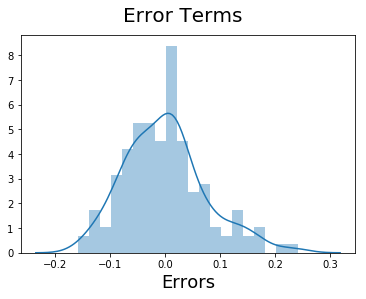

In [986]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

## Making Predictions

In [987]:
#Scaling the variables for test dataset

scaling  = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize', 'boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg','highwaympg','price']

df_test[scaling] = scaler.fit_transform(df_test[scaling])

In [988]:
# Dividing into X_test and y_test

y_test = df_test.pop('price')
X_test = df_test

In [989]:
# using the model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_lm7.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [990]:
X_test_new.columns

Index(['const', 'carwidth', 'enginesize', 'Company_bmw', 'Company_porsche',
       'cylindernumber_two'],
      dtype='object')

In [992]:
y_pred = lm6.predict(X_test_new)

# Model Evaluation

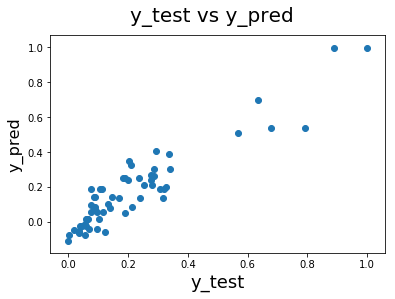

In [994]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

Text(0,0.5,'Car_Price')

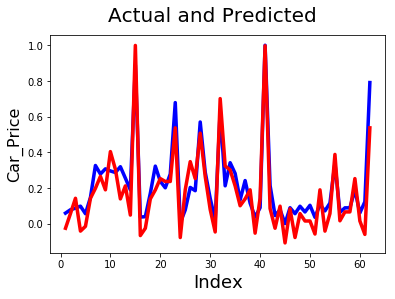

In [995]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car_Price', fontsize=16)

In [996]:
# R-squared score on the test set.

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8095700584428125

### RMSE

In [997]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.09129269544831954

In [ ]:
# so, my final model is lm6 with R squared values of train dataset is 88% 
# R squared values of test dataset is ~81%.